In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense
import matplotlib.pyplot as plt

In [3]:
#Create sequence:1 to 100
sequence = np.array([i for i in range(1,101)])

#Define window size (e.g., 3 inputs -> 1 output)
window_size=3
x=[]
y=[]
#create input-output pairs
for i in range(len(sequence) - window_size):
    x.append(sequence[i:i+window_size])
    y.append(sequence[i+window_size])
#convert to numpy array
x=np.array(x)
y=np.array(y)
#Reshape x to [samples,timesteps,features]
x=x.reshape((x.shape[0], x.shape[1],1))

In [6]:
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(window_size, 1)))
model.add(Dense(1))  #Output layer
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.fit(x, y, epochs=500, verbose=1)
print("Training Commplete")

Epoch 1/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 9400.2148
Epoch 2/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 7652.7070
Epoch 3/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5540.2261
Epoch 4/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4429.1196
Epoch 5/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3513.5676
Epoch 6/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2856.6079 
Epoch 7/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2018.8588
Epoch 8/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1410.1721
Epoch 9/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 911.5435 
Epoch 10/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 530.3276
Epoch 11/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 287.6371
Epoch 12/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 114.3726
Epoch 13/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 22.9529
Epoch 14/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7605
Epoch 15/500
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step

In [8]:
test_input = np.array([8,9,10])
test_input=test_input.reshape((1, window_size, 1))  #Reshape for prediction
predicted=model.predict(test_input, verbose=1)
print(f"Predicted next number: {predicted[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Predicted next number: 10.85


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step  


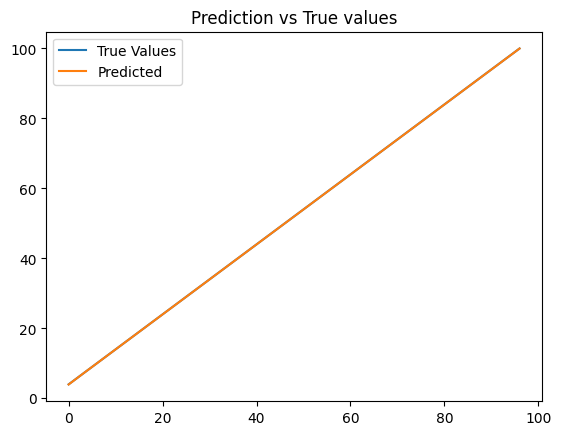

In [ ]:
predictions = model.predict(x)
plt.plot(y, label='True Values')
plt.plot(predictions,label='Predicted')
plt.legend()
plt.title("Prediction vs True values")
plt.show()

The error `NameError: name 'model' is not defined` occurs because the variable `model` was not created in the current runtime before attempting to save it.

To resolve this, ensure that the cells defining and training the model are executed before attempting to save the model.

In [12]:
import pickle
with open('model.pkl','wb')as f:
  pickle.dump(model,f)

In [14]:
import pickle
with open('/content/model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

# Now you can use loaded_model for predictions or further evaluation
# For example:
test_input = np.array([8, 9, 10]).reshape((1, window_size, 1))
predicted = loaded_model.predict(test_input, verbose=0)
print(f"predicted next number:{predicted[0][0]:.2f}")

predicted next number:10.85
